In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sn

In [5]:
df=pd.read_csv("train.csv")

In [6]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
df.shape

(404290, 6)

In [8]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
158614,158614,107377,247763,"What is the meaning and origin of the idiom ""o...","What is the meaning of ""once in a blue Moon ""?",1
358345,358345,487810,93270,Which are the top 10 best documentaries?,What are some of the best documentaries?,1
215142,215142,320949,320950,Is the driver job in Uber considered as work e...,Does working in an Indian IT service company b...,0
47296,47296,84464,84465,My boyfriend has been cheating on me with girl...,What are the chances of an American civil war ...,0
338171,338171,146734,19581,Why do people like dimples on a person's face?,Why are dimples attractive?,1
41694,41694,34694,35010,Why is Spotify nott available in India?,Daniel Ek: What are the hardships for Spotify ...,1
319022,319022,290756,444425,How do you create a standalone UITabBar (not a...,How do you create a 3D profile (random) in Mat...,0
163123,163123,253795,253796,What should I wear to my college fresher's par...,What's Twitter trend algorithm without pay?,0
323452,323452,126458,314056,How do non-INFJ feel about INFJs?,How do non-INFJs feel about INFJ?,1
401601,401601,503817,535018,How do I calculate growth rate of cashflow?,How can I calculate growth rate?,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


- missing value

In [10]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['is_duplicate'].value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

In [13]:
(df['is_duplicate'].value_counts()/df["is_duplicate"].count())*100

is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64

<Axes: xlabel='is_duplicate'>

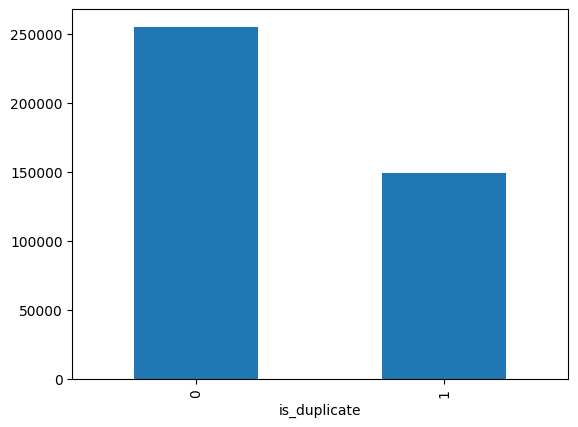

In [14]:
df['is_duplicate'].value_counts().plot(kind="bar")

As seen there is some unbalance in the datatset

- finding actual unique questions

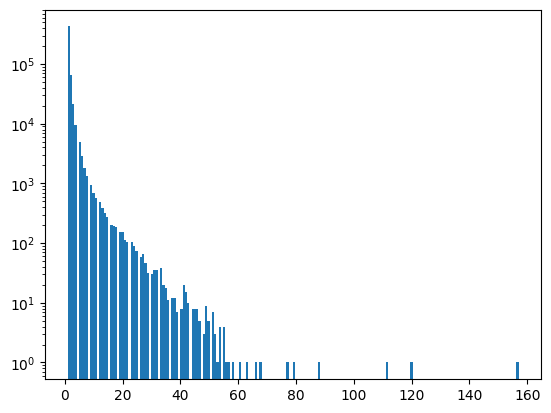

In [15]:
qids=pd.Series(df["qid1"].tolist()+df["qid2"].tolist())
mp.hist(qids.value_counts(),bins=200)
mp.yscale("log")
mp.show()

In [16]:
qids.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Name: count, Length: 537933, dtype: int64

### Perform a base classification that we need to improve on

In [17]:
ques_df=df[['question1','question2']]
ques_df.head()

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [34]:
ques_df.isnull().sum()

question1    1
question2    2
dtype: int64

In [37]:
ques_df.dropna(inplace=True)

C:\Users\dasoj\AppData\Local\Temp\ipykernel_13828\2343159209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df.dropna(inplace=True)


In [54]:
ques_df.isnull().sum()

question1    0
question2    0
dtype: int64

In [53]:
ques_df=ques_df.sample(90000)

In [55]:
questions=list(ques_df["question1"]) + list(ques_df['question2'])

In [56]:
for q in questions:
    if not isinstance(q,str):
        print(q)

In [57]:
questions_lower = list(map(str.lower, questions))

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)

In [59]:
questions_cv=cv.fit_transform(questions)

In [60]:
q1_arr,q2_arr=np.vsplit(questions_cv.toarray(),2)

In [61]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(90000, 6000)

In [62]:
temp_df['is_duplicate']=df['is_duplicate']

In [63]:
temp_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
129596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
373488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
323270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
386561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356835,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1],temp_df.iloc[:,-1],test_size=0.2)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7657777777777778

In [78]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(np.array(X_train),y_train)
y_pred2=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7657777777777778

### As seen the accuracy still happens to be 77% on both XGBoost and Random Forest Methods